<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/A_Puzzle_A_Day_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U "protobuf>=6.31,<7" ortools
import random
from ortools.sat.python import cp_model
from matplotlib import pyplot as plt
import numpy as np

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.31.1 which is incompatibl

In [ ]:


shapes = [
    np.array([
        [1,0,1],
        [1,1,1]
    ]),
    np.array([
        [1,1,1],
        [1,1,1]
    ]),
    np.array([
        [1,1,1,0],
        [0,0,1,1]
    ]),
    np.array([
        [1,1,0],
        [0,1,0],
        [0,1,1]
    ]),
    np.array([
        [1,0,0],
        [1,0,0],
        [1,1,1]
    ]),
    np.array([
        [0,1,0,0],
        [1,1,1,1]
    ]),
    np.array([
        [0,0,0,1],
        [1,1,1,1]
    ]),
    np.array([
        [1,1,1],
        [0,1,1]
    ])
]



# Original shape
transforms = set()
# Build a set of all transformations (use tuples so they are hashable)

dic_shapes = {}
for i,shape in enumerate(shapes):
  # Generate rotations
  temp_set = set()
  for k in range(4):  # 0°,90°,180°,270°
      r = np.rot90(shape, k)
      transforms.add(tuple(map(tuple, r)))           # rotation itself
      transforms.add(tuple(map(tuple, np.fliplr(r))))  # mirror horizontally
      transforms.add(tuple(map(tuple, np.flipud(r))))  # mirror vertically

      temp_set.add(tuple(map(tuple, r)))           # rotation itself
      temp_set.add(tuple(map(tuple, np.fliplr(r))))  # mirror horizontally
      temp_set.add(tuple(map(tuple, np.flipud(r))))  # mirror vertically


  dic_shapes[i] = [np.array(t) for t in temp_set]

  # Convert back to numpy arrays
unique_shapes = [np.array(t) for t in transforms]

  # Display them
all_cords = []
for i, s in enumerate(unique_shapes):
    shape = s
    coords = [(x, y)
          for x in range(shape.shape[1])       # columns
          for y in range(shape.shape[0])       # rows
          if shape[y, x] == 1]
    all_cords.append(coords)

len(transforms)

46

In [ ]:
all_shapes = {}
counter = 0
comprehensive_shapes = {}

for i, ll in dic_shapes.items():
  in_current_shape= []
  for shape in ll:
    coords = [(x, y)
      for x in range(shape.shape[1])       # columns
      for y in range(shape.shape[0])       # rows
      if shape[y, x] == 1]

    shape_index = all_cords.index(coords)
    in_current_shape.append(shape_index)
    all_shapes[shape_index] = coords

    #counter += 1
  comprehensive_shapes[i] = in_current_shape

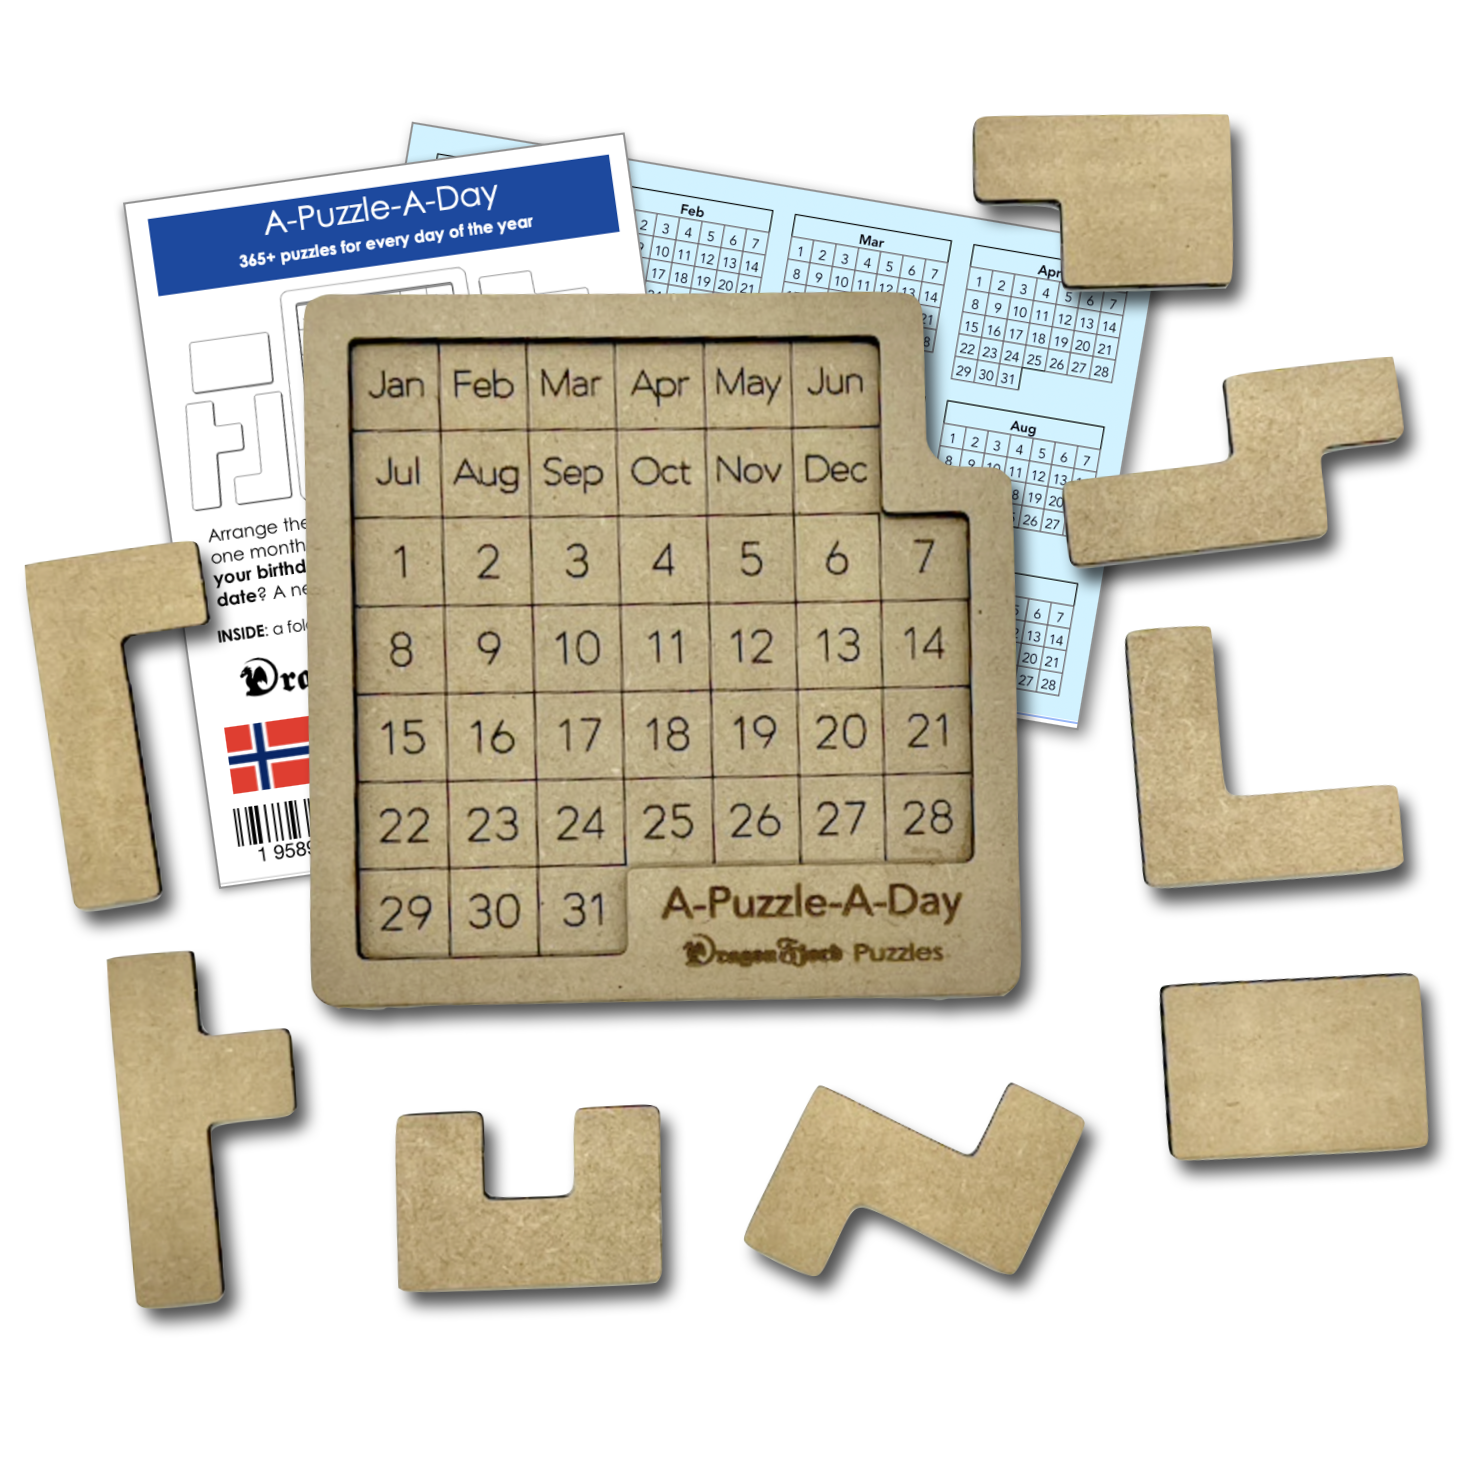

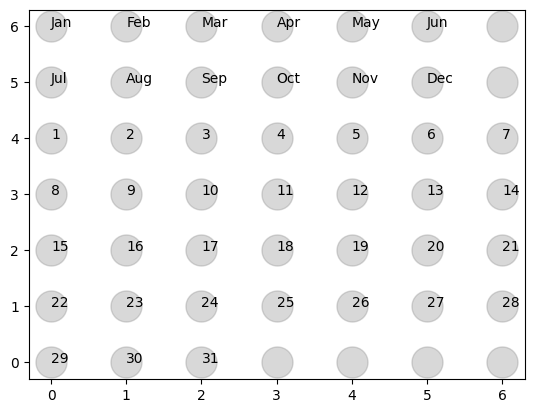

{0: [0, 0, 29],
 1: [1, 0, 30],
 2: [2, 0, 31],
 3: [3, 0, False],
 4: [4, 0, False],
 5: [5, 0, False],
 6: [6, 0, False],
 7: [0, 1, 22],
 8: [1, 1, 23],
 9: [2, 1, 24],
 10: [3, 1, 25],
 11: [4, 1, 26],
 12: [5, 1, 27],
 13: [6, 1, 28],
 14: [0, 2, 15],
 15: [1, 2, 16],
 16: [2, 2, 17],
 17: [3, 2, 18],
 18: [4, 2, 19],
 19: [5, 2, 20],
 20: [6, 2, 21],
 21: [0, 3, 8],
 22: [1, 3, 9],
 23: [2, 3, 10],
 24: [3, 3, 11],
 25: [4, 3, 12],
 26: [5, 3, 13],
 27: [6, 3, 14],
 28: [0, 4, 1],
 29: [1, 4, 2],
 30: [2, 4, 3],
 31: [3, 4, 4],
 32: [4, 4, 5],
 33: [5, 4, 6],
 34: [6, 4, 7],
 35: [0, 5, 'Jul'],
 36: [1, 5, 'Aug'],
 37: [2, 5, 'Sep'],
 38: [3, 5, 'Oct'],
 39: [4, 5, 'Nov'],
 40: [5, 5, 'Dec'],
 41: [6, 5, False],
 42: [0, 6, 'Jan'],
 43: [1, 6, 'Feb'],
 44: [2, 6, 'Mar'],
 45: [3, 6, 'Apr'],
 46: [4, 6, 'May'],
 47: [5, 6, 'Jun'],
 48: [6, 6, False]}

In [ ]:
board = {}
counter = 0
for r in range(7):
  for c in range(7):
    board[counter] = [c,r,0]
    counter += 1

banned = [3,4,5,6,48,41]



dates = {42:'Jan', 43:'Feb', 44:'Mar', 45:'Apr', 46:'May', 47:'Jun'
, 35:'Jul', 36:'Aug', 37:'Sep', 38:'Oct', 39:'Nov', 40:'Dec'}
days = {28: 1,
 29: 2,
 30: 3,
 31: 4,
 32: 5,
 33: 6,
 34: 7,
 21: 8,
 22: 9,
 23: 10,
 24: 11,
 25: 12,
 26: 13,
 27: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 7: 22,
 8: 23,
 9: 24,
 10: 25,
 11: 26,
 12: 27,
 13: 28,
  0:29, 1:30, 2:31}

for n , (r,c,v) in board.items():
  plt.scatter(r,c,s=500, color='grey', alpha=0.3)
  if n in dates:
    plt.text(r,c,s= str(dates[n]) )
    board[n][2]= dates[n]
  elif n in days:
    plt.text(r,c,s= str(days[n]) )
    board[n][2]= days[n]
  else:
    board[n][2]= False
plt.show()

board

In [ ]:

def opt_fun(actual_date):
    model = cp_model.CpModel()
    solver = cp_model.CpSolver()

    # Define shapes
    shapes_all = list(all_shapes.keys())

    # Decision variables
    U = {s: model.NewBoolVar(f"y_{s}") for s in shapes_all}
    covered = {n: model.NewBoolVar(f"covered_{n}") for n in candidates}

    # Force "actual_date" candidates to remain uncovered
    for open_c in actual_date:
        model.Add(covered[open_c] == 0)

    def check(s, n):
        """Check if shape s can be placed at candidate n."""
        x0, y0 = board[n][0], board[n][1]
        for (i, j) in all_shapes[s]:
            if (
                (x0 + i, y0 + j) not in candidates_loc
                or candidates_loc[x0 + i, y0 + j] in actual_date
            ):
                return False
        return True

    def covers(m, n, s):
        """Return True if placing shape s at m covers candidate n."""
        x0, y0 = board[m][0], board[m][1]
        xtarget, ytarget = board[n][0], board[n][1]
        for (i, j) in all_shapes[s]:
            if (x0 + i, y0 + j) == (xtarget, ytarget):
                return True
        return False

    # Each group of equivalent shapes: exactly one chosen
    for org_shape, ll in comprehensive_shapes.items():
        expr = [U[s] for s in ll]
        model.AddExactlyOne(expr)

    # Placement variables: shape s placed at candidate n
    place = {
        (s, n): model.NewBoolVar(f"placed_{s}_{n}")
        for s in shapes_all
        for n in candidates
        if check(s, n)
    }

    # Each shape is placed exactly once if it is selected
    for s in shapes_all:
        model.Add(sum(place[s, n] for n in candidates if (s, n) in place) == U[s])

    # Coverage constraints
    for n in candidates:
        expr1 = [
            place[s, m]
            for s in shapes_all
            for m in candidates
            if (s, m) in place and covers(m, n, s)
        ]
        model.Add(covered[n] >= sum(expr1))


    # Solve
    solver.parameters.max_time_in_seconds = 3 * 60
    stat = solver.Solve(model)

    print(solver.status_name(stat), solver.objective_value)
    return solver, place, stat


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visual(solver, place, KOLORS, stat):
    if solver.status_name(stat) != "OPTIMAL":
        print("No optimal solution found.")
        return

    fig, ax = plt.subplots(figsize=(6, 6))

    # Each square will be 1x1
    boxsize = 1

    # --- Draw the base board ---
    for n, (r, c, v) in board.items():
        rect = patches.Rectangle((r, c), boxsize, boxsize,
                                 facecolor="white", edgecolor="lightgray", alpha=0.6)
        ax.add_patch(rect)

        if n in actual_date:
            ax.text(r + 0.5, c + 0.5, str(board[n][2]),
                    ha="center", va="center", fontsize=12, fontweight="bold")
        elif n in dates:
            ax.text(r + 0.5, c + 0.5, str(dates[n]),
                    ha="center", va="center", fontsize=10)
            board[n][2] = dates[n]
        elif n in days:
            ax.text(r + 0.5, c + 0.5, str(days[n]),
                    ha="center", va="center", fontsize=10)
            board[n][2] = days[n]
        else:
            board[n][2] = False

    # --- Mark banned cells ---
    for n in banned:
        r, c = board[n][0], board[n][1]
        rect = patches.Rectangle((r, c), boxsize, boxsize,
                                 facecolor="black", edgecolor="black")
        ax.add_patch(rect)

    # --- Add solution placements ---
    for (s, n), v in place.items():
        if solver.Value(v) > 0.1:
            x0, y0 = board[n][0], board[n][1]

            for category, ll in comprehensive_shapes.items():
                if s in ll:
                    KOLOR = KOLORS[category]

                    for (i, j) in all_shapes[s]:
                        rect = patches.Rectangle((x0 + i, y0 + j), boxsize, boxsize,
                                                 facecolor=KOLOR, edgecolor=KOLOR, alpha=0.8)
                        ax.add_patch(rect)

    # --- Formatting ---
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(min(r for r, _, _ in board.values()),
                max(r for r, _, _ in board.values()) + 1)
    ax.set_ylim(min(c for _, c, _ in board.values()),
                max(c for _, c, _ in board.values()) + 1)
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(f"solution{actual_date}.png", dpi=300)
    plt.show()

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualblank():
    fig, ax = plt.subplots(figsize=(5, 5))

    # Each square will be 1x1
    boxsize = 1

    # --- Draw the base board ---
    for n, (r, c, v) in board.items():
        rect = patches.Rectangle((r, c), boxsize, boxsize,
                                 facecolor="white", edgecolor="black", alpha=0.9)
        ax.add_patch(rect)

        if n in dates:
            ax.text(r + 0.5, c + 0.5, str(dates[n]),
                    ha="center", va="center", fontsize=10)
            board[n][2] = dates[n]
        elif n in days:
            ax.text(r + 0.5, c + 0.5, str(days[n]),
                    ha="center", va="center", fontsize=10)
            board[n][2] = days[n]
        else:
            board[n][2] = False

    # --- Mark banned cells ---
    for n in banned:
        r, c = board[n][0], board[n][1]
        rect = patches.Rectangle((r, c), boxsize, boxsize,
                                 facecolor="black", edgecolor="black")
        ax.add_patch(rect)

    # --- Add solution placements ---

    # --- Formatting ---
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlim(min(r for r, _, _ in board.values()),
                max(r for r, _, _ in board.values()) + 1)
    ax.set_ylim(min(c for _, c, _ in board.values()),
                max(c for _, c, _ in board.values()) + 1)
    ax.axis("off")
    plt.tight_layout()
    plt.savefig(f"blank.png", dpi=300)
    plt.show()


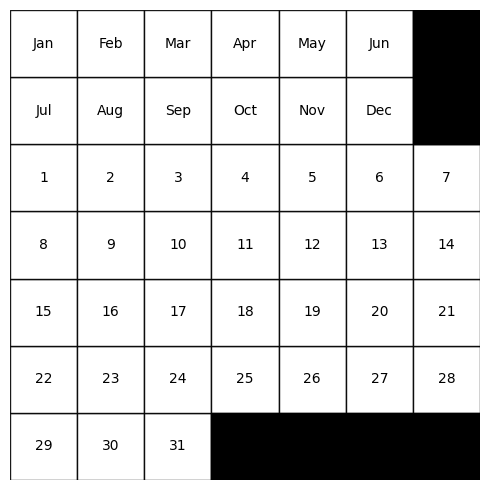

In [ ]:
visualblank()

In [1]:

KOLORS = [
    "#AEC6CF", "#FFDAB9", "#CBAACB", "#77DD77", "#FFB3BA",
    "#FFFAC8", "#CFCFC4", "#B39EB5", "#AAF0D1", "#B5EAD7"
]
day = ['Sep',4]

candidates = [n for n in board.keys() if board[n][2] ]
candidates_loc = { (board[n][0], board[n][1]):n for n in candidates }
actual_date = [n for n in candidates if board[n][2] in day]
solver, place, stat = opt_fun(actual_date)
visual(solver,place,KOLORS,stat)




NameError: name 'board' is not defined